In [1]:
import torch, time, sys
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import matplotlib.image as mpimg
import scipy.integrate
solve_ivp = scipy.integrate.solve_ivp

from data import get_dataset, get_field, get_trajectory, dynamics_fn, hamiltonian_fn,get_trajectory_stage1,get_y0

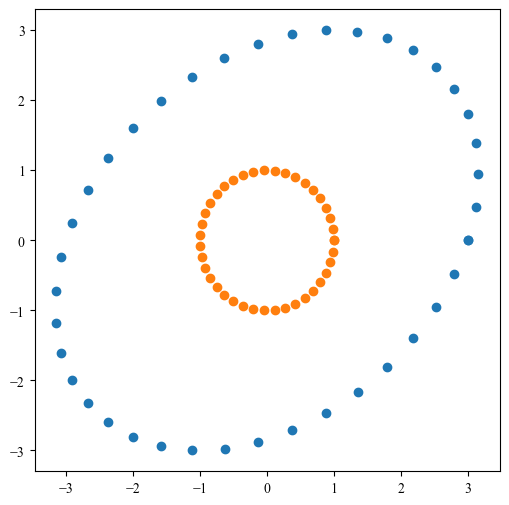

In [2]:
theta = np.linspace(0, 2 * np.pi, 40)
x = 3 * np.cos(theta) + np.sin(theta)
y = 3 * np.sin(theta)
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.scatter(np.cos(theta),np.sin(theta))


In [3]:
# for i in range(100):
#       print(get_y0())

In [4]:
q = 0.8
p = 0.00
y_stable = np.random.rand()

t_fault = np.random.rand() * 2 + 0.1
y_stable, t_fault

(0.8414266154285323, 1.7367315561570977)

In [5]:
# q = np.random.rand()
y_stable = 1.0
t_fault = 2.1
x1, y1, t1 = get_trajectory_stage1(y0=np.array([y_stable,0]),t_span=[0,t_fault], timescale = 200,noise_std=0)
# print(x1,y1)
x2, y2, dx2, dy2, t2 = get_trajectory(y0=np.array([x1[-1],y1[-1]]),t_span=[0,100], noise_std=0)

<function matplotlib.pyplot.show(close=None, block=None)>

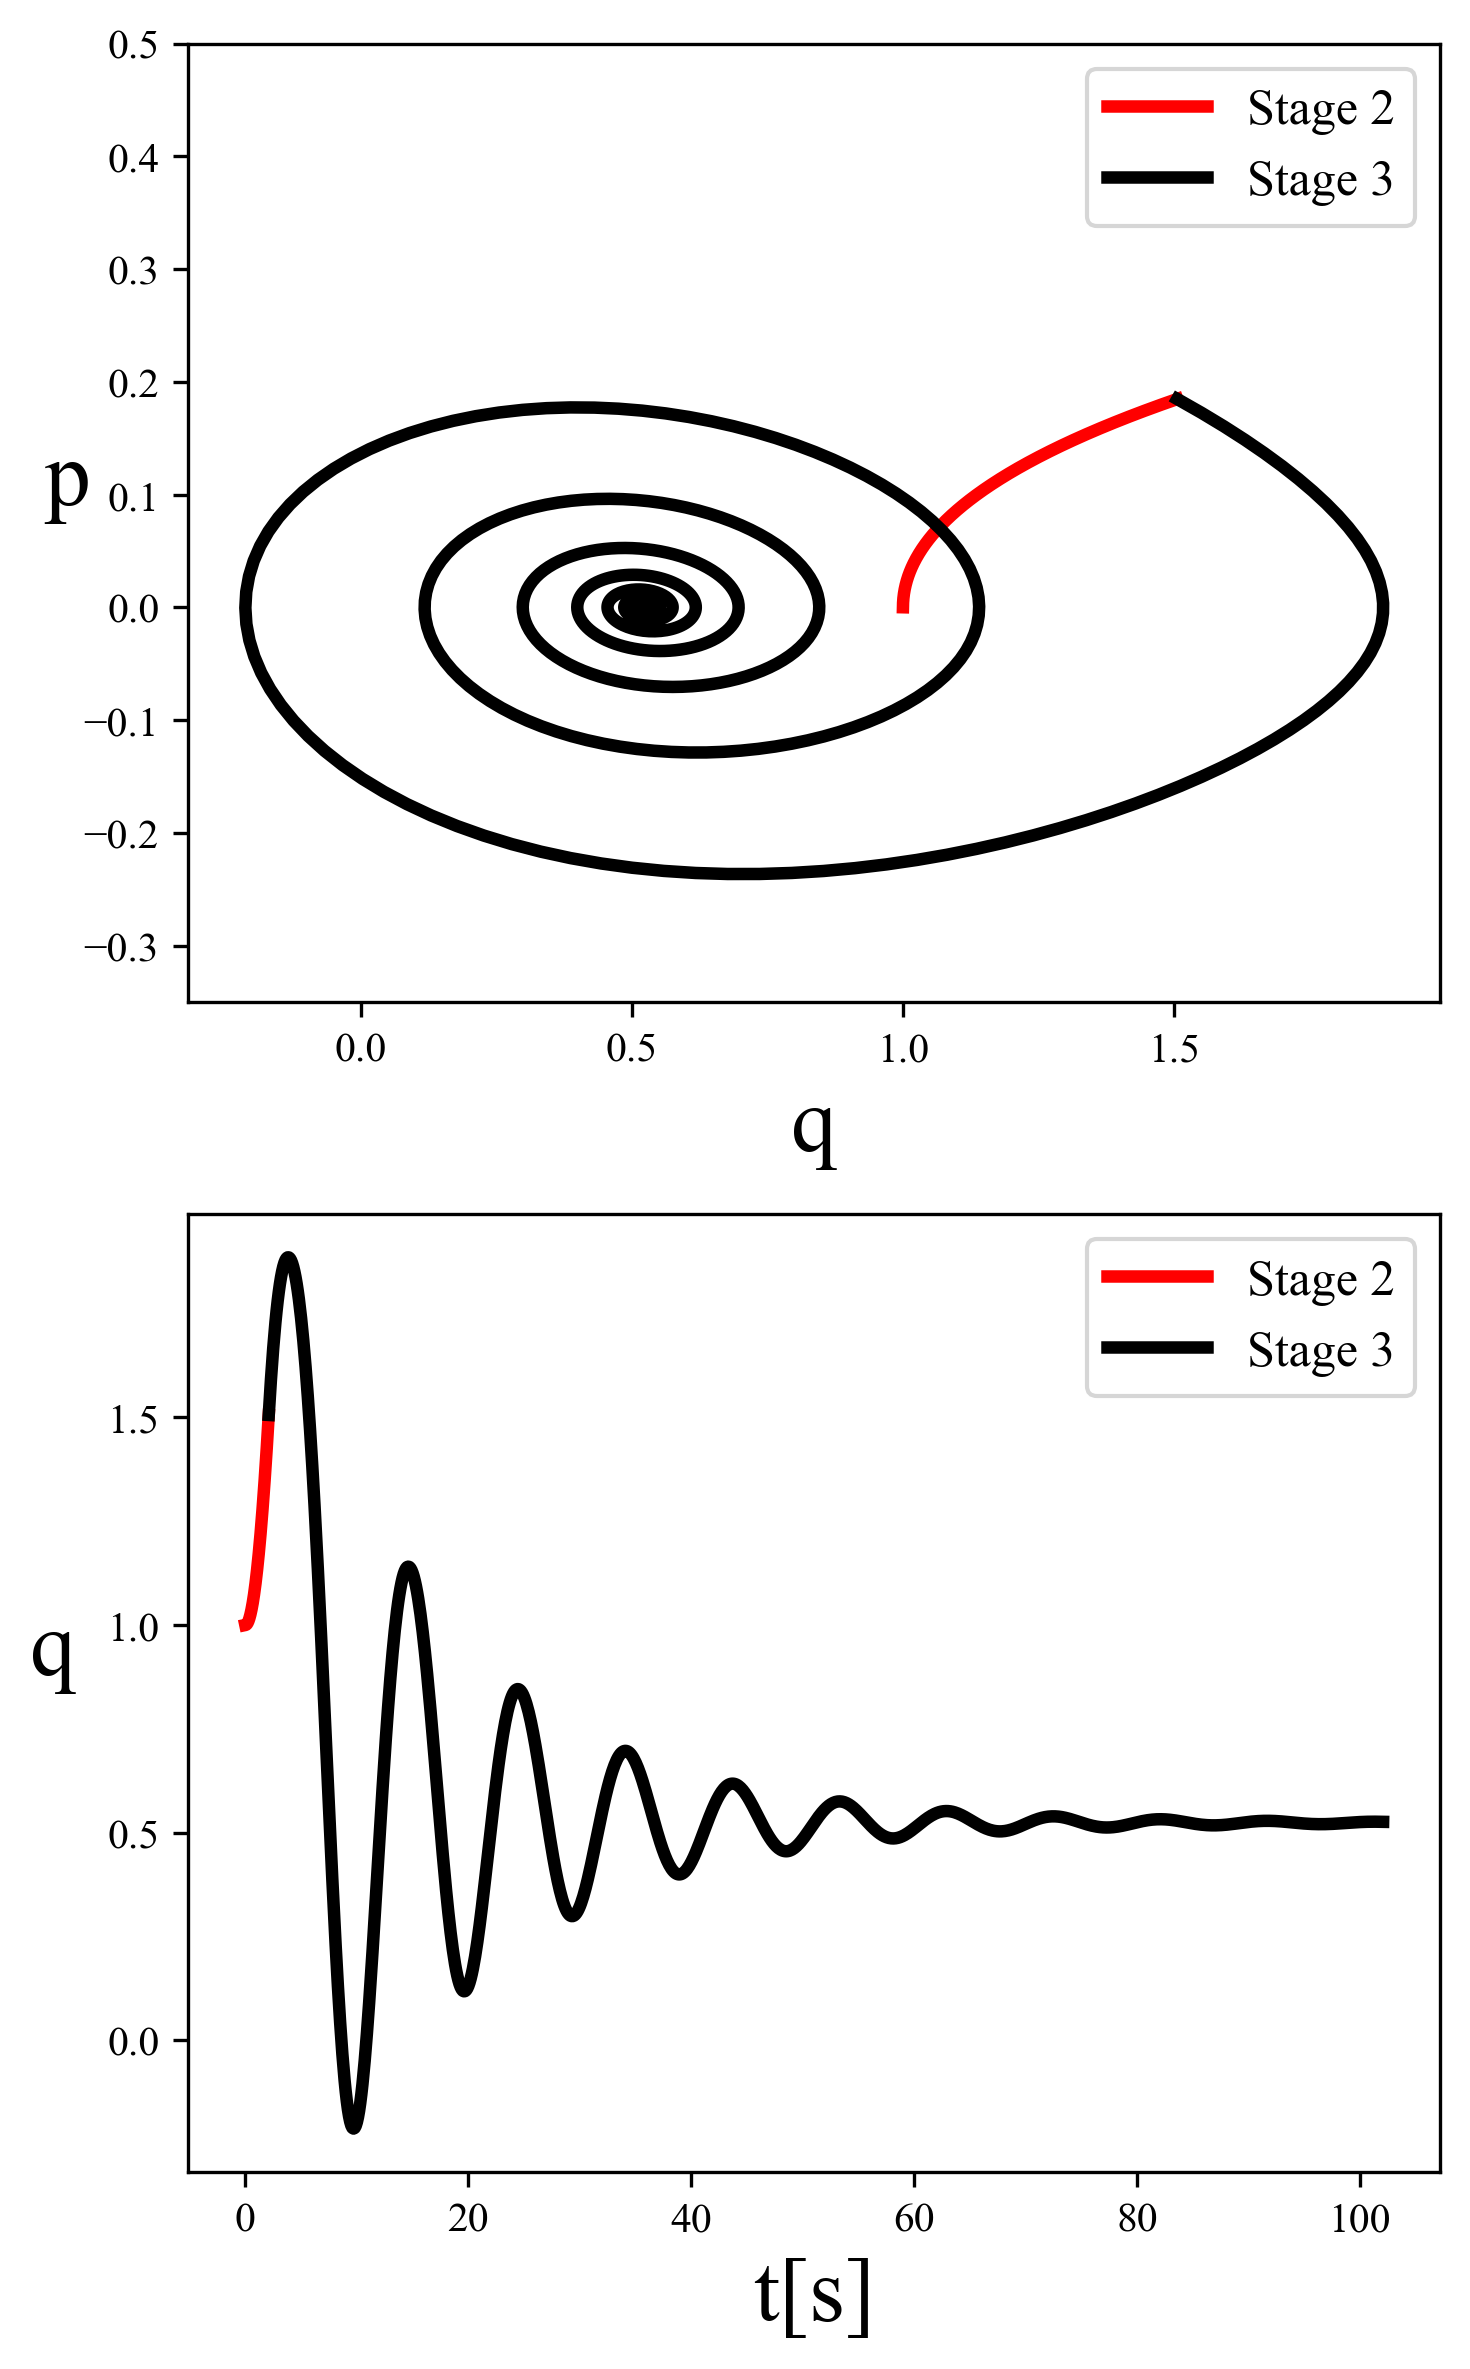

In [6]:

plt.figure(figsize = (5,8), dpi=300)
plt.subplot(2,1,1)
plt.plot(x1,y1,'r-',label='Stage 2',linewidth=3)
plt.plot(x2,y2,'k-',label='Stage 3',linewidth=3)
# plt.xlim(0,1.4) ;
plt.ylim(-0.35,0.5)
plt.xlabel("q", fontsize=22)
plt.ylabel("p", rotation=0, fontsize=22)
plt.legend(fontsize=12,loc = 1)

plt.subplot(2,1,2)
plt.plot(t1,x1,'r-',label='Stage 2',linewidth=3)
plt.plot(t2+ t1[-1],x2,'k-', label="Stage 3",linewidth=3)
# plt.xlim(0.,100) ; plt.ylim(0,1.4)
plt.xlabel("t[s]", fontsize=22)
plt.ylabel("q", rotation=0, fontsize=22, labelpad=13)
plt.legend(fontsize=12,loc = 1)
plt.tight_layout()
plt.show

In [7]:
import time, sys
EXPERIMENT_DIR = './experiment-powergrid'
sys.path.append(EXPERIMENT_DIR)

